convolutional Neural Network

week-7

**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 52s 0us/step


In [3]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size:  ',X_test.shape)
print('y_test size:  ',y_test.shape)

X_train size:  (50000, 32, 32, 3)
y_train size:  (50000, 1)
X_test size:   (10000, 32, 32, 3)
y_test size:   (10000, 1)


In [4]:
# Class names in the CIFAR-10 dataset

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'hours',
 'ship',
 'truck']

<function matplotlib.pyplot.show(close=None, block=None)>

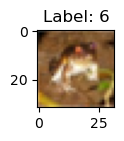

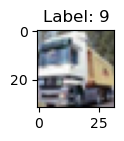

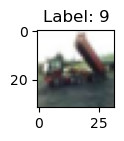

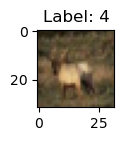

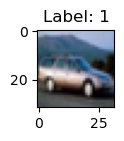

In [5]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
#
#
# Your code to display a few images before the model development.
#
#
for i in range(5):
  plt.figure(figsize=(1,1))
  plt.imshow(X_train[i])
  plt.title(f"Label: {y_train[i][0]}")
plt.show

In [6]:
# Preprocess the data
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

In [8]:
# Create an MLP model using Keras

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# print the MLP model

print(mlp_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train and evaluate the MLP classifier

history = mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.8636 - accuracy: 0.3277
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6661 - accuracy: 0.4043
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5822 - accuracy: 0.4344
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5388 - accuracy: 0.4480
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4982 - accuracy: 0.4644
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.4695 - accuracy: 0.4779
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4482 - accuracy: 0.4843
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4248 - accuracy: 0.4930
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4078 - accuracy: 0.4952
Epoch 10/10
1563/1563 [==============================] - 22s 14m

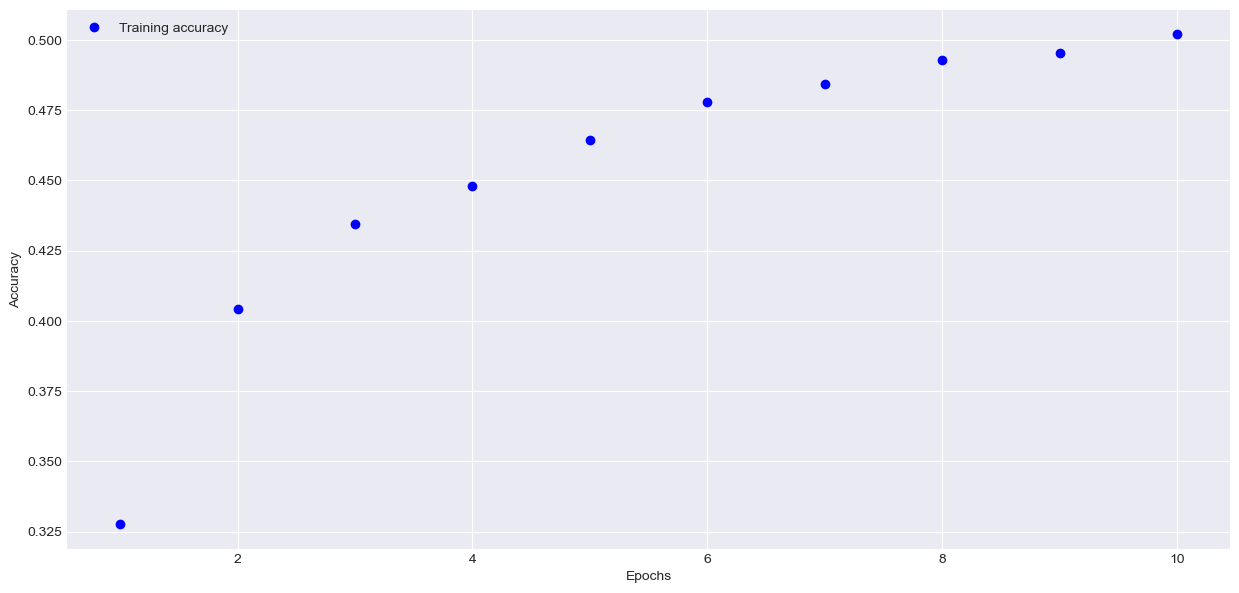

In [11]:
 # Print the training process graph and result

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 46.90%


In [15]:
# Create a CNN model using Keras

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# print the CNN model

print(cnn_model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [16]:

# compilation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train and evaluate the CNN classifier

history2 = cnn_model.fit(X_train, y_train, epochs=10, verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.5913 - accuracy: 0.7918
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5629 - accuracy: 0.8018
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.5356 - accuracy: 0.8105
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5134 - accuracy: 0.8190
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.4855 - accuracy: 0.8273
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.4639 - accuracy: 0.8345
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4437 - accuracy: 0.8412
Epoch 8/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.4240 - accuracy: 0.8475
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.3996 - accuracy: 0.8569
Epoch 10/10
1563/1563 [==============================] - 38s 24m

In [19]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 70.26%


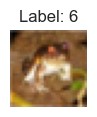

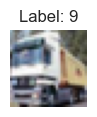

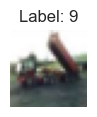

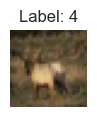

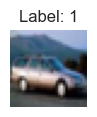

In [20]:
# Display a few images after CNN model development
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [21]:
# Your code to do the above activity.
# Hint - import time
#
#
import time
from keras.optimizers import SGD, Adam, Adadelta
from keras.utils import to_categorical


In [22]:
# Your code to do the above activity.
# Hint - Store training time and accuracy in lists
#
#

training_times = []
histories = []
accuracies=[]


In [23]:
# Your code to do the above activity.
# Hint - Put name of optimizers
#
#
optimizers = [SGD(), Adam(), Adadelta()]



In [24]:
# Your code to do the above activity.
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.
#
#
#

def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [25]:
# Your code to do the above activity.
# Hint - use loops for use different optimizers

for optimizer in optimizers:
    model = create_cnn_model()  # Create a new model for each optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), verbose=1)
    end_time = time.time()
    histories.append(history)
    training_times.append(end_time - start_time)
    accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)


Epoch 1/3
1563/1563 [==============================] - 36s 22ms/step - loss: 2.0188 - accuracy: 0.2684 - val_loss: 1.7792 - val_accuracy: 0.3615
Epoch 2/3
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6270 - accuracy: 0.4156 - val_loss: 1.6024 - val_accuracy: 0.4284
Epoch 3/3
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4524 - accuracy: 0.4811 - val_loss: 1.4297 - val_accuracy: 0.4864
Epoch 1/3
1563/1563 [==============================] - 37s 22ms/step - loss: 1.4414 - accuracy: 0.4814 - val_loss: 1.1638 - val_accuracy: 0.5915
Epoch 2/3
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0922 - accuracy: 0.6156 - val_loss: 1.0558 - val_accuracy: 0.6264
Epoch 3/3
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9678 - accuracy: 0.6624 - val_loss: 0.9688 - val_accuracy: 0.6615
Epoch 1/3
1563/1563 [==============================] - 36s 22ms/step - loss: 2.2950 - accuracy: 0.1171 - val_loss: 2.2898 - val_ac

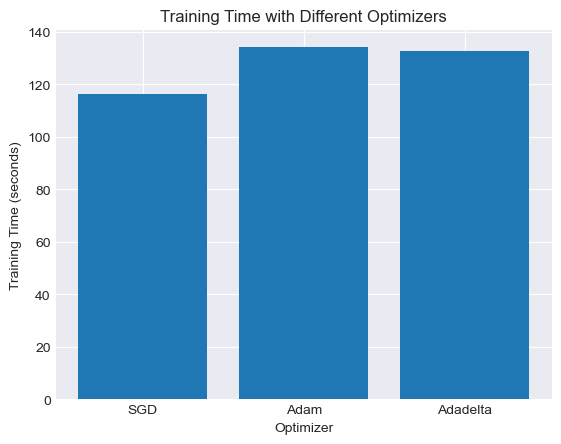

In [26]:
# Your code to do the above activity.
# Generate a bar plot to compare training times
#
#
optimizer_names = ["SGD", "Adam", "Adadelta"]
plt.bar(optimizer_names, training_times)
plt.ylabel('Training Time (seconds)')
plt.xlabel('Optimizer')
plt.title('Training Time with Different Optimizers')
plt.show()

Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.


In [27]:
for i, optimizer in enumerate(optimizers):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracy * 100:.2f}%")

<keras.optimizers.legacy.gradient_descent.SGD object at 0x00000221327400A0> Optimizer - Test Accuracy: 18.99%
<keras.optimizers.legacy.adam.Adam object at 0x000002212F2107F0> Optimizer - Test Accuracy: 18.99%
<keras.optimizers.legacy.adadelta.Adadelta object at 0x000002212F210670> Optimizer - Test Accuracy: 18.99%


In [28]:
# Your code to
# Find and print the highest achieved accuracy
#
print("sdg")

sdg
